In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

#import necessary libraries here:

In [ ]:
import pandas as pd
df=pd.read_csv('/content/gdrive/My Drive/application_train.csv')
df


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,...

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

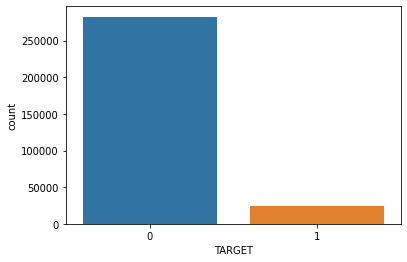

In [ ]:
#write your code here
sns.countplot(df.TARGET)  #distribution of data points for each class labels

In [ ]:
len(df.columns)   #number of features

122

In [ ]:
df=df.set_index('SK_ID_CURR')

In [ ]:
df['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
#write your code here
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace(365243, np.nan)

In [ ]:
#Convert the columns to float and the days columns to year. 
#We call the new columns as YEARS_BIRTH,... and remove the days columns.
df['DAYS_BIRTH'] = [float(-x//365)  for x in df.DAYS_BIRTH]
df['DAYS_EMPLOYED'] = [float(-x//365)  for x in df.DAYS_EMPLOYED]
df['DAYS_REGISTRATION'] = [float(-x//365)  for x in df.DAYS_REGISTRATION]
df['DAYS_ID_PUBLISH'] = [float(-x//365)  for x in df.DAYS_ID_PUBLISH]
df = df.rename(columns = {'DAYS_BIRTH': 'YEARS_BIRTH', 'DAYS_EMPLOYED': 'YEARS_EMPLOYED', 'DAYS_REGISTRATION': 'YEARS_REGISTRATION', 'DAYS_ID_PUBLISH': 'YEARS_ID_PUBLISH', })


In [ ]:
bins=['young adults', 'adults', 'seniors']      #Create bins of ['young adults', 'adults', 'seniors'] for YEARS_BIRTH with [19., 36., 53., 70.] border ages and remove YEARS_BIRTH column.
ba=[19,36,53,70]
df['Age']=pd.cut(df['YEARS_BIRTH'],ba,labels=bins)
print(df['Age'])
df.drop(['YEARS_BIRTH'],axis=1,inplace=True)

SK_ID_CURR
100002    young adults
100003          adults
100004          adults
100006          adults
100007         seniors
              ...     
456251    young adults
456252         seniors
456253          adults
456254    young adults
456255          adults
Name: Age, Length: 307511, dtype: category
Categories (3, object): [young adults < adults < seniors]


In [ ]:
#Finding missing values

df.isnull().sum()

TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
                              ...  
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Age                               0
Length: 121, dtype: int64

In [ ]:
df['ORGANIZATION_TYPE']=df['ORGANIZATION_TYPE'].replace('XNA',np.NaN)
df['CODE_GENDER']=df['CODE_GENDER'].replace('XNA',np.NaN)

In [ ]:
df=df.replace(r'^\s+$',np.NaN,regex=True)

In [ ]:
df.fillna(value=df.median(),inplace=True)

In [ ]:
df.isnull().sum()

TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   4
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Age                           0
Length: 121, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for label in df.select_dtypes('object').columns:
    if pd.Series.nunique(df[label])<=307511:
        df[label]=le.fit_transform(df[label].astype(str))      

In [ ]:
df.isnull().sum()

TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Age                           0
Length: 121, dtype: int64

In [ ]:
le_Age = LabelEncoder()
df['AGE']=le_Age.fit_transform(df['Age'])

In [ ]:
df=df.drop(['Age'],axis='columns')

In [ ]:
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,...,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,1.0,9.0,5.0,9.0,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.083037,...,0.0193,0.0000,0.0000,3,0,0.0149,5,0,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2
100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,3.0,3.0,0.0,9.0,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.311267,...,0.0558,0.0039,0.0100,3,0,0.0714,0,0,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,0.0,11.0,6.0,26.0,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.505998,...,0.0749,0.0000,0.0031,0,1,0.0688,7,2,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,8.0,26.0,6.0,9.0,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.505998,...,0.0749,0.0000,0.0031,0,1,0.0688,7,2,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0
100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,8.0,11.0,9.0,9.0,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.505998,...,0.0749,0.0000,0.0031,0,1,0.0688,7,2,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,0,0,1,0,0,0,157500.0,254700.0,27558.0,225000.0,6,7,4,2,5,0.032561,0.0,23.0,5.0,9.0,1,1,0,1,0,0,14,1.0,1,1,4,15,0,0,0,0,0,0,43,0.145570,...,0.2001,0.0757,0.1118,3,0,0.2898,5,0,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2
456252,0,0,0,0,1,0,72000.0,269550.0,12001.5,225000.0,6,3,4,5,1,0.025164,4.0,12.0,11.0,9.0,1,0,0,1,1,0,18,1.0,2,2,1,8,0,0,0,0,0,0,57,0.505998,...,0.0261,0.0000,0.0000,3,0,0.0214,5,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1
456253,0,0,0,0,1,0,153000.0,677664.0,29979.0,585000.0,6,7,1,2,1,0.005002,21.0,18.0,14.0,9.0,1,1,0,1,0,1,10,1.0,3,3,4,9,0,0,0,0,1,1,39,0.744026,...,0.9445,0.0000,0.0000,3,0,0.7970,4,0,6.0,0.0,6.0,0.0,-1909.0,0,1,

In [ ]:
features=df.drop('TARGET',axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_x=StandardScaler()
x1=sc_x.fit_transform(features)

In [ ]:
y=df['TARGET']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x1, y, train_size = 0.80,test_size=0.2,random_state=12345)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.decomposition import PCA
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
from keras.initializers import Zeros, RandomNormal, he_normal

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=2, max_depth=None)
clf = clf.fit(X_train, Y_train)
score = clf.score(X_test, Y_test)
print(score)

0.8519421816821944


In [ ]:
max_depth_range = [15, 20, 25]
features_range = ['auto', 'sqrt', 'log2']
accuracy = []
for depth in max_depth_range:
    print('Tree Depth:', depth)
    cla = DecisionTreeClassifier(max_depth = depth)
    cla.fit(X_train, Y_train)
    score = cla.score(X_test, Y_test)
    print('Accuracy:', score)
    accuracy.append(score)
for features in features_range:
    print('The number of features to consider when looking for the best split:', features)
    cla = DecisionTreeClassifier(max_features = features)
    cla.fit(X_train, Y_train)
    score = cla.score(X_test, Y_test)
    print('Accuracy:', score)
    accuracy.append(score)

Tree Depth: 15
Accuracy: 0.907744337674585
Tree Depth: 20
Accuracy: 0.8909484090206982
Tree Depth: 25
Accuracy: 0.874867892623124
The number of features to consider when looking for the best split: auto
Accuracy: 0.8542997902541339
The number of features to consider when looking for the best split: sqrt
Accuracy: 0.8546412370128287
The number of features to consider when looking for the best split: log2
Accuracy: 0.8546412370128287


In [ ]:
alpha_range = [200, 500, 1000, 2000]
max_depth_range = [7, 10]
accuracy = []
cv_scores_list=[]
for alpha in alpha_range:
    print('Alpha:', alpha)
    clf = RandomForestClassifier(min_samples_split = alpha) 
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    print('Accuracy:', score)
    accuracy.append(score)
    cv_scores = cross_val_score(clf, x1, y,cv=5)
    cv_scores_list.append(np.mean(cv_scores))
    print('Cross-validation scores (5-fold):', cv_scores)
    print('Mean cross-validation score (5-fold): {:.3f}'.format(np.mean(cv_scores)))
for depth in max_depth_range:
    print('Depth:', depth)
    clf = RandomForestClassifier(max_depth = depth) 
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    print('Accuracy:', score)
    accuracy.append(score)
    cv_scores = cross_val_score(clf, x1, y,cv=5)
    cv_scores_list.append(np.mean(cv_scores))
    print('Cross-validation scores (5-fold):', cv_scores)
    print('Mean cross-validation score (5-fold): {:.3f}'.format(np.mean(cv_scores)))

Alpha: 200
Accuracy: 0.9204591645935971
Cross-validation scores (5-fold): [0.91927223 0.91927092 0.91927092 0.91927092 0.91927092]
Mean cross-validation score (5-fold): 0.919
Alpha: 500
Accuracy: 0.9204591645935971
Cross-validation scores (5-fold): [0.91927223 0.91927092 0.91927092 0.91927092 0.91927092]
Mean cross-validation score (5-fold): 0.919
Alpha: 1000
Accuracy: 0.9204591645935971
Cross-validation scores (5-fold): [0.91927223 0.91927092 0.91927092 0.91927092 0.91927092]
Mean cross-validation score (5-fold): 0.919
Alpha: 2000
Accuracy: 0.9204591645935971
Cross-validation scores (5-fold): [0.91927223 0.91927092 0.91927092 0.91927092 0.91927092]
Mean cross-validation score (5-fold): 0.919
Depth: 7
Accuracy: 0.9204591645935971
Cross-validation scores (5-fold): [0.91927223 0.91927092 0.91927092 0.91927092 0.91927092]
Mean cross-validation score (5-fold): 0.919
Depth: 10
Accuracy: 0.9204591645935971
Cross-validation scores (5-fold): [0.91927223 0.91927092 0.91927092 0.91927092 0.91927

In [ ]:
clf = RandomForestClassifier() 
clf.fit(X_train, Y_train)
importances = pd.DataFrame({'feature':list(X_train.columns),'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances.head(15)

AttributeError: ignored

In [ ]:
pcamodel = PCA(n_components=120)
pca = pcamodel.fit_transform(x1)

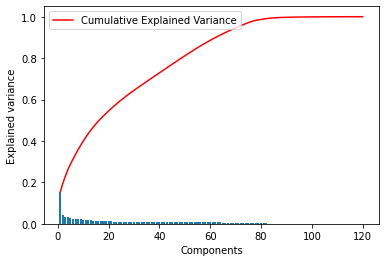

In [ ]:
plt.bar(range(1,len(pcamodel.explained_variance_ratio_ )+1),pcamodel.explained_variance_ratio_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pcamodel.explained_variance_ratio_ )+1),
         np.cumsum(pcamodel.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#Compile the model:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#Fit the model:
model.fit(X_train, Y_train, batch_size=32, epochs=3)

#Evaluate the model:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)

Epoch 1/3
7688/7688 [==============================] - 10s 1ms/step - loss: 0.2653 - accuracy: 0.9189
Epoch 2/3
7688/7688 [==============================] - 10s 1ms/step - loss: 0.2615 - accuracy: 0.9190
Epoch 3/3
7688/7688 [==============================] - 10s 1ms/step - loss: 0.2617 - accuracy: 0.9190
1922/1922 - 1s - loss: 0.2630 - accuracy: 0.9205

Test loss: 0.26301640272140503

Test accuracy: 0.9204591512680054


In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#Fit the model:
model.fit(X_train, Y_train, epochs=3)

#Evaluate the model:
train_loss, train_acc = model.evaluate(X_train,  Y_train, verbose=2)
print('\nTrain loss:', train_loss)
print('\nTrain accuracy:', train_acc)

Epoch 1/3
7688/7688 [==============================] - 10s 1ms/step - loss: 0.2619 - accuracy: 0.9190
Epoch 2/3
7688/7688 [==============================] - 10s 1ms/step - loss: 0.2620 - accuracy: 0.9189
Epoch 3/3
7688/7688 [==============================] - 10s 1ms/step - loss: 0.2629 - accuracy: 0.9189
7688/7688 - 6s - loss: 0.2620 - accuracy: 0.9190

Train loss: 0.26204439997673035

Train accuracy: 0.9189701080322266


In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

#Fit the model:
model.fit(X_train, Y_train, epochs=3)

#Evaluate the model:
train_loss, train_acc = model.evaluate(X_train,  Y_train, verbose=2)
print('\nTrain loss:', train_loss)
print('\nTrain accuracy:', train_acc)

Epoch 1/3
7688/7688 [==============================] - 12s 2ms/step - loss: 0.2557 - accuracy: 0.9189
Epoch 2/3
7688/7688 [==============================] - 12s 2ms/step - loss: 0.2525 - accuracy: 0.9190
Epoch 3/3
7688/7688 [==============================] - 13s 2ms/step - loss: 0.2513 - accuracy: 0.9191
7688/7688 - 6s - loss: 0.2493 - accuracy: 0.9190

Train loss: 0.24931436777114868

Train accuracy: 0.9189944863319397


In [ ]:
model.compile(optimizer='Adagrad', loss='binary_crossentropy', metrics=['accuracy'])

#Fit the model:
model.fit(X_train, Y_train, epochs=3)

#Evaluate the model:
train_loss, train_acc = model.evaluate(X_train,  Y_train, verbose=2)
print('\nTrain loss:', train_loss)
print('\nTrain accuracy:', train_acc)

Epoch 1/3
7688/7688 [==============================] - 9s 1ms/step - loss: 0.2484 - accuracy: 0.9192
Epoch 2/3
7688/7688 [==============================] - 9s 1ms/step - loss: 0.2482 - accuracy: 0.9192
Epoch 3/3
7688/7688 [==============================] - 9s 1ms/step - loss: 0.2482 - accuracy: 0.9192
7688/7688 - 6s - loss: 0.2481 - accuracy: 0.9192

Train loss: 0.24813158810138702

Train accuracy: 0.9192302823066711


In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#Compile the model:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#Fit the model:
model.fit(X_train, Y_train, batch_size=32, epochs=3)

#Evaluate the model:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)


Epoch 1/3
7688/7688 [==============================] - 11s 1ms/step - loss: 0.2686 - accuracy: 0.9188
Epoch 2/3
7688/7688 [==============================] - 12s 2ms/step - loss: 0.2699 - accuracy: 0.9190
Epoch 3/3
7688/7688 [==============================] - 12s 2ms/step - loss: 0.2708 - accuracy: 0.9190
1922/1922 - 1s - loss: 0.2636 - accuracy: 0.9205

Test loss: 0.2635543942451477

Test accuracy: 0.9204591512680054


In [ ]:
#write your code here
#Define the model:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#Compile the model:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#Fit the model:
model.fit(X_train, Y_train, batch_size=32, epochs=3)

#Evaluate the model:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)

Epoch 1/3
7688/7688 [==============================] - 11s 1ms/step - loss: 0.2651 - accuracy: 0.9187
Epoch 2/3
7688/7688 [==============================] - 12s 2ms/step - loss: 0.2626 - accuracy: 0.9190
Epoch 3/3
7688/7688 [==============================] - 12s 2ms/step - loss: 0.2620 - accuracy: 0.9189
1922/1922 - 1s - loss: 0.2619 - accuracy: 0.9205

Test loss: 0.2618994414806366

Test accuracy: 0.9204591512680054


In [ ]:
#Define the model:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_initializer='RandomNormal'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#Compile the model:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#Fit the model:
model.fit(X_train, Y_train, batch_size=32, epochs=3)

#Evaluate the model:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)

Epoch 1/3
7688/7688 [==============================] - 13s 2ms/step - loss: 0.2651 - accuracy: 0.9189
Epoch 2/3
7688/7688 [==============================] - 12s 2ms/step - loss: 0.2634 - accuracy: 0.9189
Epoch 3/3
7688/7688 [==============================] - 12s 2ms/step - loss: 0.2629 - accuracy: 0.9189
1922/1922 - 1s - loss: 0.2621 - accuracy: 0.9205

Test loss: 0.26206985116004944

Test accuracy: 0.920475423336029


In [ ]:
#Define the model:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_initializer='Zeros'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#Compile the model:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#Fit the model:
model.fit(X_train, Y_train, batch_size=32, epochs=3)

#Evaluate the model:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)

Epoch 1/3
7688/7688 [==============================] - 11s 1ms/step - loss: 0.3197 - accuracy: 0.9190
Epoch 2/3
7688/7688 [==============================] - 12s 1ms/step - loss: 0.2813 - accuracy: 0.9190
Epoch 3/3
7688/7688 [==============================] - 12s 2ms/step - loss: 0.2813 - accuracy: 0.9190
1922/1922 - 1s - loss: 0.2777 - accuracy: 0.9205

Test loss: 0.27765801548957825

Test accuracy: 0.9204591512680054


In [ ]:
#Define the model:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_normal'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#Compile the model:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#Fit the model:
model.fit(X_train, Y_train, batch_size=32, epochs=3)

#Evaluate the model:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)

Epoch 1/3
7688/7688 [==============================] - 12s 2ms/step - loss: 0.2657 - accuracy: 0.9188
Epoch 2/3
7688/7688 [==============================] - 12s 2ms/step - loss: 0.2613 - accuracy: 0.9190
Epoch 3/3
7688/7688 [==============================] - 11s 1ms/step - loss: 0.2623 - accuracy: 0.9188
1922/1922 - 1s - loss: 0.2603 - accuracy: 0.9205

Test loss: 0.26034045219421387

Test accuracy: 0.9204591512680054


In [ ]:
#write your code here
#Define the model:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

#Compile the model:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#Fit the model:
model.fit(X_train, Y_train, batch_size=32, epochs=3)

#Evaluate the model:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)

Epoch 1/3
7688/7688 [==============================] - 12s 2ms/step - loss: 0.2683 - accuracy: 0.9160
Epoch 2/3
7688/7688 [==============================] - 13s 2ms/step - loss: 0.2596 - accuracy: 0.9189
Epoch 3/3
7688/7688 [==============================] - 12s 2ms/step - loss: 0.2594 - accuracy: 0.9190
1922/1922 - 1s - loss: 0.2586 - accuracy: 0.9201

Test loss: 0.2586359977722168

Test accuracy: 0.9201014637947083


In [ ]:
#Define the model:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#Compile the model:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#Fit the model:
model.fit(X_train, Y_train, batch_size=32, epochs=3)

#Evaluate the model:
train_loss, train_acc = model.evaluate(X_train,  Y_train, verbose=2)
print('\nTrain loss:', train_loss)
print('\nTrain accuracy:', train_acc)
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)

Epoch 1/3
7688/7688 [==============================] - 11s 1ms/step - loss: 0.2795 - accuracy: 0.9189
Epoch 2/3
7688/7688 [==============================] - 11s 1ms/step - loss: 0.2634 - accuracy: 0.9190
Epoch 3/3
7688/7688 [==============================] - 11s 1ms/step - loss: 0.2626 - accuracy: 0.9190
7688/7688 - 5s - loss: 0.2614 - accuracy: 0.9190

Train loss: 0.2614136040210724

Train accuracy: 0.9189741611480713
1922/1922 - 1s - loss: 0.2589 - accuracy: 0.9205

Test loss: 0.25885525345802307

Test accuracy: 0.9204591512680054


In [ ]:
#Define the model:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

#Compile the model:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#Fit the model:
model.fit(X_train, Y_train, batch_size=32, epochs=3)

#Evaluate the model:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)

Epoch 1/3
7688/7688 [==============================] - 11s 1ms/step - loss: 0.2788 - accuracy: 0.9188
Epoch 2/3
7688/7688 [==============================] - 11s 1ms/step - loss: 0.2722 - accuracy: 0.9189
Epoch 3/3
7688/7688 [==============================] - 11s 1ms/step - loss: 0.2732 - accuracy: 0.9189
1922/1922 - 1s - loss: 0.2616 - accuracy: 0.9205

Test loss: 0.26159489154815674

Test accuracy: 0.9204591512680054


In [ ]:
#write your code here
clf = svm.SVC(kernel='linear') # Linear Kernel: still takes too long to run
clf.fit(X_train, Y_train)

In [ ]:
cv_scores = cross_val_score(clf, x1, y,cv=10)
cv_scores_list.append(np.mean(cv_scores))
print('Cross-validation scores (10-fold):', cv_scores)
print('Mean cross-validation score (10-fold): {:.3f}'.format(np.mean(cv_scores))

In [ ]:
test_pred=clf.predict(X_test)
print(classification_report(Y_test, test_pred))